
### Comments
***This problem can be solved with a mostly standard BFS approach.*** 

Standard level tranversal.

Only thing that really diverts aways from standard BSF is:

* Multilple starting as we can assume the rot starts at each rotten orange at min 0.
* No need for visited set as we can mark the squares visited with fresh oranges as 2.
* We need to keep a set for the good oranges to avoid islands as there is no way to propergate the rot to those fresh oranges eg:
    2 0 0 0
    0 0 1 0
    0 0 0 0

Cases:
* No fresh oranges (doesnt matter if there is rotten oranges)
* Good oranges only
* Rotten oranges and good oranges

### Complexity:

***Time***: O(n*m)

Worst case we explore every square.

***Space***: O(n*m + o)

Worst case we go over every square in our queue and we need to keep our good oranges set.

In [ ]:
from collections import deque

class Solution:
    def orangesRotting(self, grid: list[list[int]]) -> int:
        maxLevel = -1
        m, n = len(grid),len(grid[0])

        q = deque()
        goodOranges = set()

        for row in range(m):
            for col in range(n):
                if(grid[row][col]==2):
                    #  Add multiple starting rot oranges.
                    q.append((row,col,0))
                elif(grid[row][col]==1):
                    goodOranges.add((row,col))

        # No good oranges
        if(len(goodOranges) == 0):
            return 0
        # No rotten oranges and good oranges
        if(not q and goodOranges):
            return -1
        

        while(q):
            for _ in range(len(q)):
                (x,y,l) = q.popleft()
                maxLevel = max(maxLevel,l)
                for (x2,y2) in [(1,0),(0,1),(-1,0),(0,-1)]:
                    x3,y3 = x+x2, y+y2
                    if(0<=x3<m and 0<=y3<n and grid[x3][y3] == 1):
                        q.append((x3,y3,l+1))
                        grid[x3][y3] = 2
                        if((x3,y3) in goodOranges):
                            goodOranges.remove((x3,y3))


        return maxLevel if(len(goodOranges) == 0)else -1

        
s = Solution()


print(s.orangesRotting([[2,2],[1,1],[0,0],[2,0]]))
print(s.orangesRotting([[2,2,2,1,1]]))
print(s.orangesRotting([[2,1,1],[1,1,0],[0,1,1]]))
print(s.orangesRotting([[2,1,1],[0,1,1],[1,0,1]]))
print(s.orangesRotting([[0,2]]))

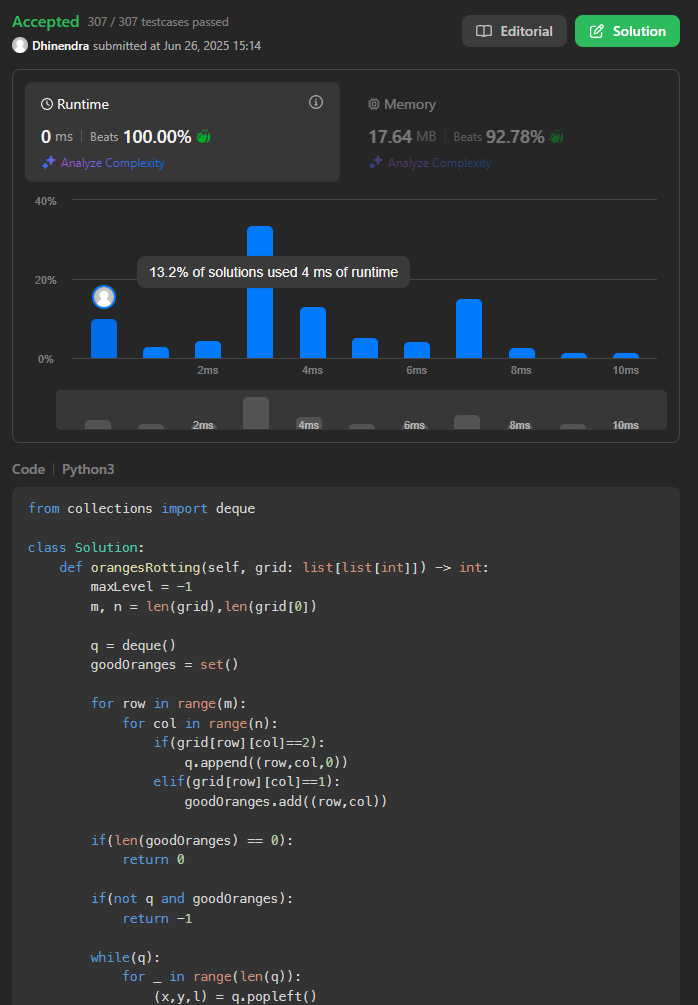